# Tutorial by Py Quant
Sean Schumacher

Practicing using Python to improve portfolio performance by monitoring Value at Risk

In [1]:
# import libraries

%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

import yfinance as yf

In [3]:
# define the variables

# portfolio of stocks
tickers = ['AAPL', 'TSLA', 'CHV']

# weights of stocks
weights = np.array([0.25, 0.4, 0.35])

# size of portfolio
portfolio_value = 1000

# confidence interval (95%)
confidence = 0.05

# download ticker data
data = yf.download(tickers, start='2018-01-01', end='2021-12-31')['Close']

[*********************100%***********************]  3 of 3 completed


## Compute stock portfolio stats

In [5]:
# compute daily returns of each stock
returns = data.pct_change()
returns

,AAPL,CHV,TSLA
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.000174,0.000000,-0.010233
2018-01-04,0.004645,-0.082192,-0.008290
2018-01-05,0.011385,0.029851,0.006230
2018-01-08,-0.003714,0.115942,0.062638
...,...,...,...
2021-12-23,0.003644,0.000000,0.057619
2021-12-27,0.022975,0.000000,0.025248
2021-12-28,-0.005767,0.000000,-0.005000


In [7]:
# compute the daily mean returns of each stock
mean_returns = returns.mean()
mean_returns

AAPL    0.001628
CHV    -0.000440
TSLA    0.003639
dtype: float64

In [10]:
# compute portfolio mean return
port_mean = mean_returns.dot(weights)
port_mean

0.0015045914311101977

In [11]:
investment_mean = (1 + port_mean) * portfolio_value
investment_mean

1001.5045914311103

In [12]:
# compute the portfolio covariance matrix
cov_matrix = returns.cov()
cov_matrix

,AAPL,CHV,TSLA
AAPL,4.296629e-04,9.373692e-07,0.000355
CHV,9.373692e-07,7.748392e-05,0.000010
TSLA,3.546269e-04,1.049481e-05,0.001683


In [14]:
# compute portfolio standard deviation
investment_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
investment_stdev

0.01762525413994502

## Compute VaR

In [16]:
percent_point = norm.ppf(confidence, investment_mean, investment_stdev)
percent_point

1001.4756004679123

In [18]:
# calculate the VaR at the confidence interval
value_at_risk = portfolio_value - percent_point
value_at_risk

-1.4756004679122725

In [19]:
f'portfolio VaR: {value_at_risk}'

'portfolio VaR: -1.4756004679122725'

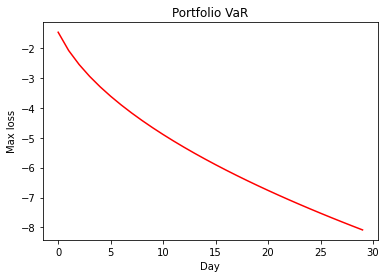

In [22]:
values_at_risk = value_at_risk * np.sqrt(range(1,31))

# plot VaR over time
plt.xlabel('Day')
plt.ylabel('Max loss')
plt.title('Portfolio VaR')
plt.plot(values_at_risk, 'r')

Read more about value at risk here: https://en.wikipedia.org/wiki/Value_at_risk